In [28]:
from google.colab import files
uploaded = files.upload()

Saving extractfeaturetoronto.csv to extractfeaturetoronto (1).csv


In [0]:
#library imports
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
#import descartes
from keras.models import Sequential
from scipy.stats import chisquare, chi2_contingency, chi2
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation
from mpl_toolkits.basemap import Basemap
from keras.optimizers import SGD
from hyperas import optim
from hyperas.distributions import choice, uniform
import io
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from keras import regularizers
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
!pip install folium
!pip install hyperas
!pip install hyperopt
!pip install -U -q PyDrive

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (50.5 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131186 files and directories currently installed.)
Pre

     |████████████████████████████████| 2.8MB 2.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702068 sha256=b93c2b65bbe8ff0e47b2381ab96841756de147053a2d0c54e5ba57b243adeaac
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.3.0
    Uninstalling pyproj-2.3.0:
      Successfully uninstalled pyproj-2.3.0
     |████████████████████████████████| 993kB 2.8MB/s 


In [30]:
#Reading Data using pandas
df = pd.read_csv(io.BytesIO(uploaded['extractfeaturetoronto.csv']))
df.head()
#checking the data details
print(df.describe())

         Unnamed: 0  ...     date_diff
count  20303.000000  ...  16316.000000
mean   10152.000000  ...    433.848431
std     5861.115593  ...    477.191927
min        1.000000  ...      0.000000
25%     5076.500000  ...     59.000000
50%    10152.000000  ...    269.000000
75%    15227.500000  ...    667.000000
max    20303.000000  ...   3249.000000

[8 rows x 16 columns]


In [31]:
df.shape

(20303, 29)

In [32]:
#Data Cleaning Process
# % of rows droppped
(len(df)-df.count())/len(df)*100
df.iloc[:,0]
#df = df.drop(df.columns[0], axis=1)
#removing pecentage sign inhost repsone rate column and reaplaing by percetnage mean
#def datacleaning(df):
columns = ['security_deposit', 'cleaning_fee','price']
df[columns] = df[columns].replace({'\$': '', ',':''}, regex=True)
df['host_response_rate'] = df['host_response_rate'].replace({'%':''}, regex = True)
df['host_response_rate']= df['host_response_rate'].fillna(95)
#df[columns].fillna(df[columns].mean().to_dict())
#df1 = df[columns]
df['cleaning_fee'] = df['cleaning_fee'].astype(float)
df['price'] = df['price'].astype(float)
df['security_deposit'] = df['security_deposit'].astype(float)
#replacing with mean values in date_diff and review_score rating and column array
df = df.fillna(df.mean())

df.head(100)
 # return df
#Repalcing dollar sign in Proce , security deposit and cleaning fee column
#df['price'] = (df['price'].str.split()).apply(lambda x: float(x.replace('$', '')))
#df['price'] = df['price'].apply(lambda x: x[16].replace('$',''))
#df['security_deposit'] = df['security_deposit'].str.replace('[$, ]', '').astype('float')
#df['cleaning_fee'] = df['cleaning_fee'].str.replace("[$, ]", "").astype("float")

#replacing with mean
#df['price'] = df['price'].astype(float)
#df['price'].fillna((df['price'].mean()), inplace=True)



#df['security_deposit'] = df['security_deposit'].astype(int)
#df.iloc[:,"security_deposit"].mean()
#df['security_deposit'] = df['security_deposit'].apply(lambda x: x.replace('$',''))
#df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: x.replace('$',''))
#result = [] 
#for value in df["security_deposit"]: 
 #   if value <= 0: 
  #      result.append("Pass") 
   # elif value < 0 and value > 100: 
    #    result.append("Invalid") 
    #else: 
     #   result.append("Fail") 
       
#df["Result"] = result    
#def availability(asd):
#df['security_deposit'] = df['security_deposit'].fillna(0)
#df['security_deposit'] = df['security_deposit'].replace({'%':''}, regex = True)
#df['security_deposit'] = df['security_deposit'].apply(lambda y: y.replace('$',''))
#df['security_deposit'] = df['security_deposit'].str.replace('$', '')
#df['security_deposit'] = df['security_deposit'].astype(int)
#def availability(asd):
 #   if asd['security_deposity'] == 0:
#df['security_deposit'].replace(0,df['security_deposit'].mean())
#Applying function of the dataframe   
#df['security_deposity'] = df.apply(lambda asd: availability(asd), axis = 1)     


#df.head()
# Replacing the missing values with mean
#df['reviews_per_month'].fillna((df['reviews_per_month'].mean()), inplace=True)
#print(df.describe())
#df['reviews_per_month'] = df['reviews_per_month'].apply(np.floor)

,Unnamed: 0,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,date_diff
0,1,95,f,1.0,t,Little Portugal,43.64617,-79.42451,f,House,Entire home/apt,10,3.00000,5.0,7.0,Real Bed,469.0,1000.000000,150.000000,1,4,730,0,7,2015-07-19,2017-12-04,100.000000,1,869.000000
1,2,0,f,2.0,f,Downtown Toronto,43.64105,-79.37628,t,Apartment,Private room,2,1.50000,1.0,1.0,Real Bed,101.0,2693.000000,59.430558,1,180,365,0,169,2009-08-20,2013-08-27,97.000000,2,1468.000000
2,3,95,f,1.0,t,The Annex,43.66724,-79.41598,t,House,Private room,1,1.50000,1.0,1.0,Pull-out Sofa,67.0,134.000000,27.000000,1,1,10,0,0,NaN,NaN,94.488719,1,433.848431
3,4,100,t,2.0,t,Fairbank,43.69602,-79.45468,t,House,Private room,3,1.00000,1.0,1.0,Real Bed,73.0,0.000000,0.000000,2,1,28,211,209,2010-05-31,2019-04-23,95.000000,2,3249.000000
4,5,95,f,1.0,t,Greenwood-Coxwell,43.66890,-79.32592,t,Apartment,Entire home/apt,1,1.00000,0.0,1.0,Real Bed,54.0,329.586547,59.430558,2,120,365,0,26,2010-06-07,2011-08-30,98.000000,1,449.000000
5,6,0,f,2.0,f,Harbourfront,43.64151,-79.37643,t,Apartment,Entire home/apt,2,1.50000,1.0,2.0,Real Bed,135.0,4040.000000,59.430558,1,180,365,365,1,2010-08-11,2010-08-11,100.000000,2,0.000000
6,7,100,f,3.0,f,Parkdale,43.63532,-79.44049,t,House,Entire home/apt,5,1.00000,2.0,2.0,Real Bed,150.0,750.000000,125.000000,2,30,365,352,101,2010-08-03,2019-05-05,92.000000,3,3197.000000
7,8,100,f,2.0,t,Oakridge,43.69458,-79.28681,t,Apartment,Entire home/apt,2,1.00000,0.0,1.0,Real Bed,68.0,329.586547,40.000000,2,2,730,155,79,2016-11-27,2019-04-28,94.000000,2,882.000000
8,9,100,t,1.0,t,Wexford/Maryvale,43.74858,-79.29111,t,Bungalow,Entire home/apt,4,1.00000,2.0,2.0,Real Bed,110.0,150.000000,0.000000,1,2,90,365,26,2017-01-04,2019-05-03,99.000000,1,849.000000
9,10,100,f,16.0,t,Rosedale,43.67185,-79.38583,t,Apartment,Entire home/apt,2,1.00000,1.0,1.0,Real Bed,119.0,0.000000,75.000000,2,1,365,306,49,2010-10-04,2019-04-27,80.000000,12,3127.000000


In [33]:
df.shape
len(df.columns)

29

In [0]:
#Creating new dataframe to work with
df1 = df
#removing missing values and 2 extra columns
for i in range(1,3):
  if len(df1.columns) == 29:  
    del df1['first_review']
    del df1['last_review']
    #df1.drop(df1.columns[0], axis=1)
  else:
    #the shape is 20303 and 27 columns 
    #df1 = df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
    df1.dropna()
    df1.shape
    #Now we checked all missing vlaues removed from mean as the the percetnage is grater than 5 percent so we cant remove it.
    (len(df1)-df1.count())/len(df1)*100
    #Making new column for high and low avaialibity
    def availability(asd):
        if asd['availability_365'] >= 180:
          return 'high'
        return 'low'
    #Applying function of the dataframe   
    df1['Availabilityclass'] = df1.apply(lambda asd: availability(asd), axis = 1)     

    #Making new column for price classes
    def pricecol(asd):
      if asd['price'] <= 100:
        return 'cheap'
      if asd['price'] > 100 and asd['price'] < 200:
        return 'affordable'
      if asd['price'] >= 200:
        return 'expensive'
    #Applying function ot the dataframe using lambdas   
    df1['Priceclass'] = df1.apply(lambda asd: pricecol(asd), axis = 1) 
    df1.head()

In [35]:
#df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1.head()
#df1['host_response_rate'].value_counts()

,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,date_diff,Availabilityclass,Priceclass
0,95,f,1.0,t,Little Portugal,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,469.0,1000.000000,150.000000,1,4,730,0,7,100.000000,1,869.000000,low,expensive
1,0,f,2.0,f,Downtown Toronto,43.64105,-79.37628,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,101.0,2693.000000,59.430558,1,180,365,0,169,97.000000,2,1468.000000,low,affordable
2,95,f,1.0,t,The Annex,43.66724,-79.41598,t,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,67.0,134.000000,27.000000,1,1,10,0,0,94.488719,1,433.848431,low,cheap
3,100,t,2.0,t,Fairbank,43.69602,-79.45468,t,House,Private room,3,1.0,1.0,1.0,Real Bed,73.0,0.000000,0.000000,2,1,28,211,209,95.000000,2,3249.000000,high,cheap
4,95,f,1.0,t,Greenwood-Coxwell,43.66890,-79.32592,t,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,54.0,329.586547,59.430558,2,120,365,0,26,98.000000,1,449.000000,low,cheap


Text(0.5, 1.0, 'Property types')

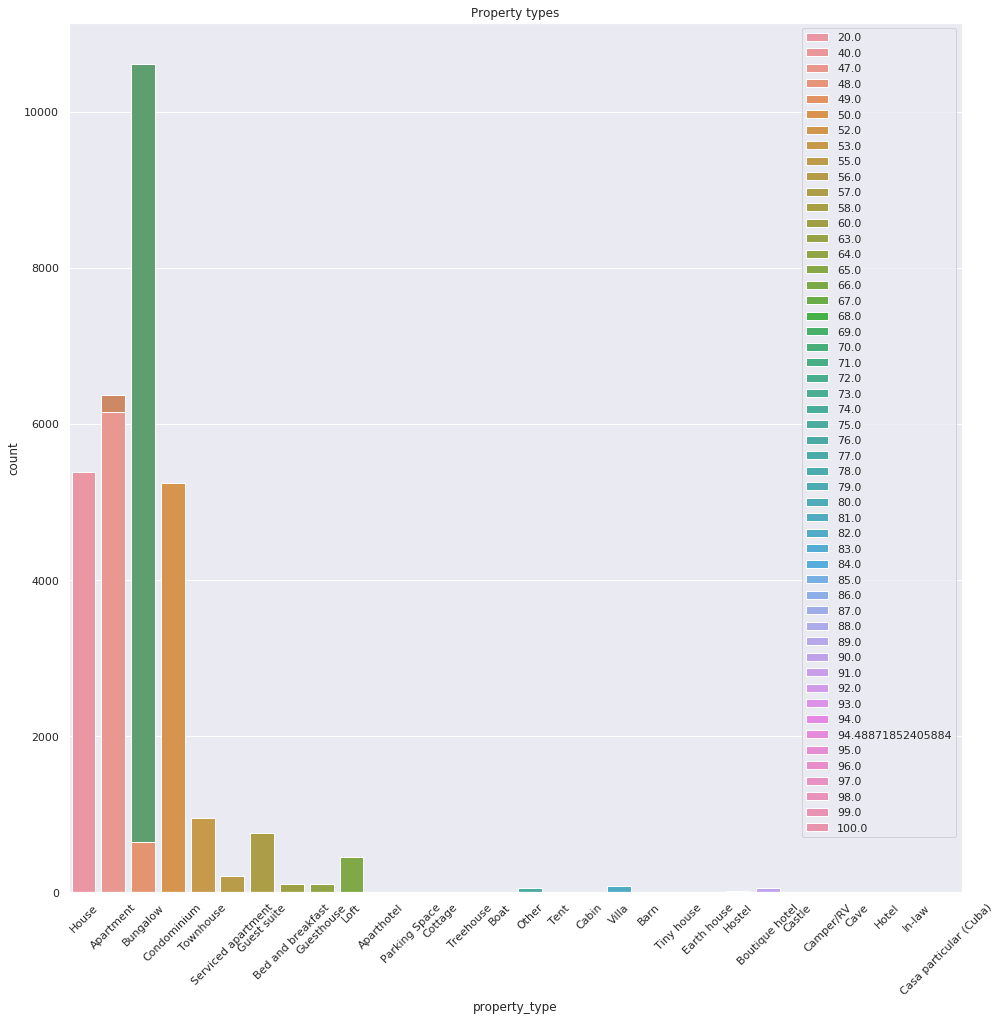

In [36]:
#Data Visualization
df1.head()
#x = df1['price'].plot.hist(grid=True, bins=20, rwidth=0.9, color='red')
#plt.title('latitudes in toronto range')
#plt.xlabel('Count')
#plt.ylabel('longitude value')
#plt.grid(axis='y', alpha=1)
sns.countplot(x='Priceclass', data=df1)
g = sns.countplot(x='property_type', hue='review_scores_rating', data=df1)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)
g.legend(loc=1)
g.set_title("Scores by property_type")
g.figure.set_size_inches(16,16)
t = sns.countplot(x='property_type', data=df1)
loc, labels = plt.xticks()
t.set_xticklabels(labels, rotation=45)
t.legend(loc=1)
t.figure.set_size_inches(16,16)
t.set_title("Property types")

W0822 17:16:48.088680 140203641079680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0822 17:16:49.193799 140203641079680 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


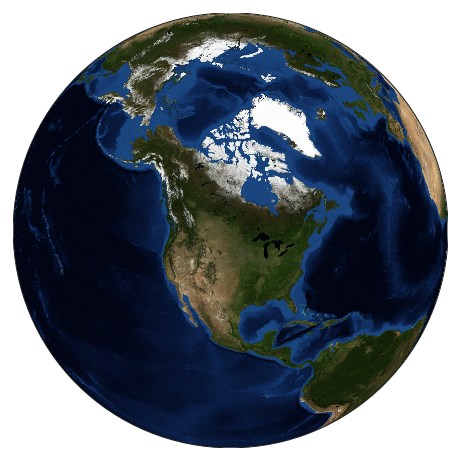

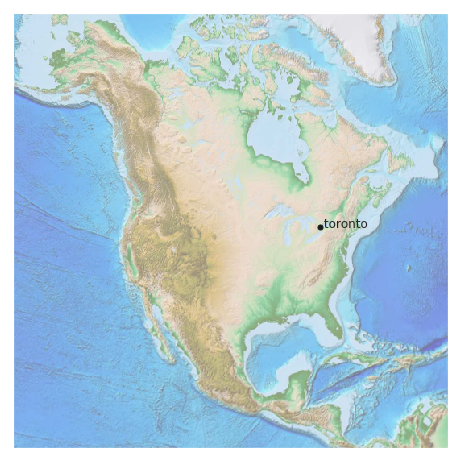

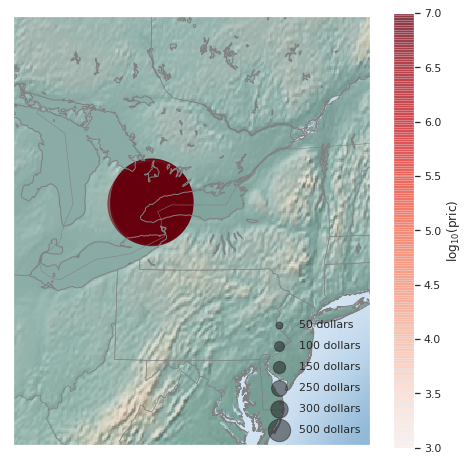

In [37]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-79.38, 43.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' toronto', fontsize=12);

#Drawing map using latitude and longitude cordinates
# 1. Draw the map background
lati = df1['latitude'].values
long = df1['longitude'].values
pric = df1['price'].values
sec = df1['security_deposit'].values
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=43, lon_0=-78,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(long, lati, latlon=True,
          c=pric, s=sec,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm pric})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [50,100,150,250,300,500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' dollars')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower right');

In [38]:
# only need Lat_Dec, Lon_Dec and Price
cofiLOC = df1[['latitude', 'longitude','Priceclass', 'Availabilityclass']]
cofiLOC = cofiLOC.tail(500)
cofiLOC = cofiLOC.reset_index(drop=True)  # reset index 
#  Make an empty world map, 
#  zoom into the mean Latitude and Longitude
#  zoom_start=0 is the world map
map1 = folium.Map(location=[cofiLOC.latitude.mean(),cofiLOC.longitude.mean()], zoom_start=7)

marker_cluster = MarkerCluster().add_to(map1)

#  Add all datapoints to map.  Add "Dates" to popups
for i in range(len(cofiLOC)):
    folium.Marker(location=[cofiLOC.latitude[i],cofiLOC.longitude[i]],
            popup = (cofiLOC.Availabilityclass[i]),# + (cofiLOC.Avaiabilityclass[i]),
            icon = folium.Icon(color='green')
    ).add_to(marker_cluster)

map1.add_child(marker_cluster)

#  Showing map of location toronto areas price classes
map1

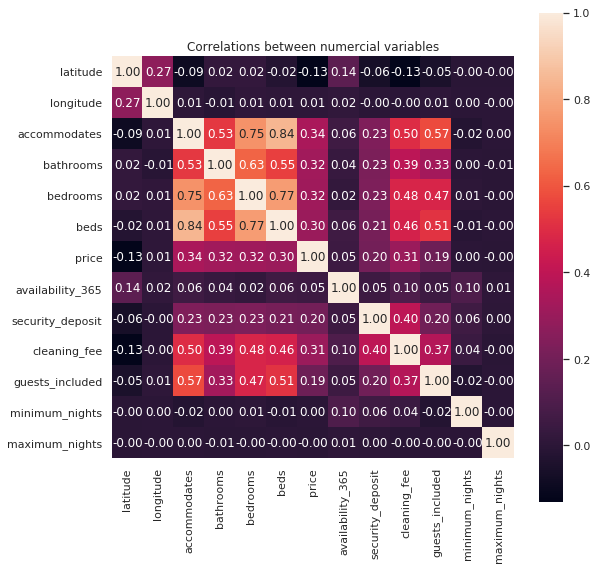

In [39]:
df1['log'] = np.log(df1.price)
#finding corelation between continous factors
continous = ['latitude', 'longitude', 'accommodates',	'bathrooms',	'bedrooms', 'beds','price', 'availability_365',
                'security_deposit',	'cleaning_fee',	'guests_included',	'minimum_nights',	'maximum_nights']
#Find out correlation between columns and plot
corrs = np.corrcoef(df1[continous].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(9,9)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = continous, xticklabels = continous).set_title('Correlations between numercial variables')

fig = hm.get_figure()

In [40]:
#applying Chi sqaure hypotheses testing
#creating a subset to work with cateogrical varaibles
cat = ['host_is_superhost', 'host_identity_verified', 'neighbourhood','is_location_exact', 'property_type', 'room_type', 'bed_type','Availabilityclass', 'Priceclass']
categorical = df1[cat]
categorical.head()
for i in categorical.columns:
    #creating contingency table 
    #pd.crosstab([categorical.neighbourhood, categorical.property_type, categorical.room_type, categorical.bed_type], categorical.Priceclass,margins=True)
    table = pd.crosstab(i, categorical.Priceclass,margins=True)
    stat, p, dof, expected = chi2_contingency(table)
    stat, p, dof, expected
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Varaibles are Dependent (reject Null Hypothesis)')
    else:
        print('Varailbes are Independent (we cannot reject Null Hypothesis)')
    table = None
    stat = None
    dof = None
    expected = None
    #By calcualting the relation between availability class and price class and other categorical variables
    # we found out that all variables are dependent to class variables except host identity verfied followed the null hypothesis
categorical.head()

Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)
Varailbes are Independent (we cannot reject Null Hypothesis)


,host_is_superhost,host_identity_verified,neighbourhood,is_location_exact,property_type,room_type,bed_type,Availabilityclass,Priceclass
0,f,t,Little Portugal,f,House,Entire home/apt,Real Bed,low,expensive
1,f,f,Downtown Toronto,t,Apartment,Private room,Real Bed,low,affordable
2,f,t,The Annex,t,House,Private room,Pull-out Sofa,low,cheap
3,t,t,Fairbank,t,House,Private room,Real Bed,high,cheap
4,f,t,Greenwood-Coxwell,t,Apartment,Entire home/apt,Real Bed,low,cheap


In [41]:
  df1.dtypes
#Creatign subset for applying chi sqaure to find relation between cateogrical variable and independent numerical variable
cont = ['latitude', 'longitude', 'accommodates',	'bathrooms',	'bedrooms', 'beds','Priceclass', 'Availabilityclass',
                'security_deposit',	'cleaning_fee',	'guests_included',	'minimum_nights',	'maximum_nights']
numerical = df1[cont]
numerical.head()
#creating contingency table 
#pd.crosstab([categorical.neighbourhood, categorical.property_type, categorical.room_type, categorical.bed_type], categorical.Priceclass,margins=True)
table1 = pd.crosstab(numerical.maximum_nights, numerical.Priceclass,margins=True)
stat, p, dof, expected = chi2_contingency(table1)
stat, p, dof, expected
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Varaibles are Dependent (reject Null Hypothesis)')
else:
    print('Varailbes are Independent (we cannot reject Null Hypothesis)')
#By calcualting the relation between availability class and price class and other categorical variables
# we found out that all variables are dependent to class variables except host identity verfied followed the null hypothesis

Varaibles are Dependent (reject Null Hypothesis)


In [42]:
stat

1168.9502749395658

In [43]:
#Creation of Dummy Variables and data pre-processing to fit for the algorithm.
df1.head()
def str_bol(a):
    if(a['is_location_exact']=='t' or a['host_identity_verified']=='t' or a['host_is_superhost']=='t'):
      return True
    if(a['is_location_exact']=='f' or a['host_identity_verified']=='f' or a['host_is_superhost']=='f'):
      return False
    else:
      pass   
     
def pric(ss):
      if (ss['Priceclass'] =='cheap' or ss['Availabilityclass'] == 'low'):
        return '0'
      if ss['Priceclass'] == 'affordable':
        return '1'
      if ss['Priceclass'] =='expensive':
        return '2'
      if ss['Availabilityclass'] == 'high':
        return '1'
      else:
        pass
df1['is_location_exact'] = df1.apply(lambda a: str_bol(a), axis = 1)
df1['host_identity_verified'] = df1.apply(lambda a: str_bol(a), axis = 1)
df1['host_is_superhost'] = df1.apply(lambda a: str_bol(a), axis = 1)
df1['Priceclass'] = df1.apply(lambda ss: pric(ss), axis = 1)
df1['Availabilityclass'] = df1.apply(lambda ss: pric(ss), axis = 1)
#creating dummy variables for categorical 

df1.head()

,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,date_diff,Availabilityclass,Priceclass,log
0,95,False,1.0,True,Little Portugal,43.64617,-79.42451,True,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,469.0,1000.000000,150.000000,1,4,730,0,7,100.000000,1,869.000000,0,0,6.150603
1,0,False,2.0,False,Downtown Toronto,43.64105,-79.37628,True,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,101.0,2693.000000,59.430558,1,180,365,0,169,97.000000,2,1468.000000,0,0,4.615121
2,95,False,1.0,True,The Annex,43.66724,-79.41598,True,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,67.0,134.000000,27.000000,1,1,10,0,0,94.488719,1,433.848431,0,0,4.204693
3,100,True,2.0,True,Fairbank,43.69602,-79.45468,True,House,Private room,3,1.0,1.0,1.0,Real Bed,73.0,0.000000,0.000000,2,1,28,211,209,95.000000,2,3249.000000,1,0,4.290459
4,95,False,1.0,True,Greenwood-Coxwell,43.66890,-79.32592,True,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,54.0,329.586547,59.430558,2,120,365,0,26,98.000000,1,449.000000,0,0,3.988984


In [44]:
df1.dtypes

host_response_rate                 object
host_is_superhost                  object
host_listings_count               float64
host_identity_verified             object
neighbourhood                      object
latitude                          float64
longitude                         float64
is_location_exact                    bool
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
price                             float64
security_deposit                  float64
cleaning_fee                      float64
guests_included                     int64
minimum_nights                      int64
maximum_nights                      int64
availability_365                    int64
number_of_reviews                   int64
review_scores_rating              

In [0]:
#creating dummy variables for categorical 
df1['host_response_rate'] = df1['host_response_rate'].astype(int)
dum = ['neighbourhood', 'property_type', 'room_type', 'bed_type']
dummy = pd.get_dummies(df1, columns = ['neighbourhood', 'property_type', 'room_type', 'bed_type'], drop_first=True)
numericalvariables = ['accommodates',	'bathrooms', 'beds','price', 'availability_365','date_diff', 'review_scores_rating', 'host_response_rate', 'minimum_nights', 
                      'calculated_host_listings_count', 'security_deposit',	'cleaning_fee',	'guests_included', 'maximum_nights', 'number_of_reviews', 'bedrooms', 'host_listings_count' ]
scalingfeatures = df1[numericalvariables]
#standardized_X = preprocessing.scale(scalingfeatures)
#pd.DataFrame(standardized_X)
#dummy.head()
#def standarized(x):
 # return x - min(x) / max(x) - min(x)
#scalingfeatures = scalingfeatures.apply(lambda x: standarized(x), axis = 0)
scalingfeatures.head()
#removing the numericals variables from dummy dataframe
dummy.drop(numericalvariables, axis=1, inplace=True)
#dummy.drop(['latitude', 'longitude', 'log'], axis=1, inplace=True)
#frames = [dummy, standardized_X]
#standardized_X.head()
#dataframe1 = pd.concat(frames)
#dataframe1.head()
#scalingfeatures.dtpyes

In [46]:
for i in scalingfeatures.columns:
    scalingfeatures[i] = scalingfeatures[i].astype(int)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(scalingfeatures), columns=scalingfeatures.columns)
    
df_scaled

,accommodates,bathrooms,beds,price,availability_365,date_diff,review_scores_rating,host_response_rate,minimum_nights,calculated_host_listings_count,security_deposit,cleaning_fee,guests_included,maximum_nights,number_of_reviews,bedrooms,host_listings_count
0,0.600000,0.375,0.411765,0.034932,0.000000,0.267467,1.0000,0.95,0.002669,0.000000,0.148965,0.18750,0.000000,3.394671e-07,0.009986,0.333333,0.005495
1,0.066667,0.125,0.058824,0.007523,0.000000,0.451831,0.9625,0.00,0.159253,0.013514,0.401162,0.07375,0.000000,1.695007e-07,0.241084,0.066667,0.010989
2,0.000000,0.125,0.058824,0.004990,0.000000,0.133272,0.9250,0.95,0.000000,0.000000,0.019961,0.03375,0.000000,4.190952e-09,0.000000,0.066667,0.005495
3,0.133333,0.125,0.058824,0.005437,0.578082,1.000000,0.9375,1.00,0.000000,0.013514,0.000000,0.00000,0.066667,1.257285e-08,0.298146,0.066667,0.010989
4,0.000000,0.125,0.058824,0.004022,0.000000,0.138196,0.9750,0.95,0.105872,0.000000,0.049009,0.07375,0.066667,1.695007e-07,0.037090,0.000000,0.005495
5,0.066667,0.125,0.117647,0.010055,1.000000,0.000000,1.0000,0.00,0.159253,0.013514,0.601817,0.07375,0.000000,1.695007e-07,0.001427,0.066667,0.010989
6,0.266667,0.125,0.117647,0.011172,0.964384,0.983995,0.9000,1.00,0.025801,0.027027,0.111724,0.15625,0.066667,1.695007e-07,0.144080,0.133333,0.016484
7,0.066667,0.125,0.058824,0.005065,0.424658,0.271468,0.9250,1.00,0.000890,0.013514,0.049009,0.05000,0.066667,3.394671e-07,0.112696,0.000000,0.010989
8,0.200000,0.125,0.117647,0.008193,1.000000,0.261311,0.9875,1.00,0.000890,0.000000,0.022345,0.00000,0.000000,4.144385e-08,0.037090,0.133333,0.005495
9,0.066667,0.125,0.058824,0.008863,0.838356,0.962450,0.7500,1.00,0.000000,0.148649,0.000000,0.09375,0.066667,1.695007e-07,0.069900,0.066667,0.087912


In [47]:
dummy.head()
dummy1 = dummy
dummy3 = dummy
dummy4 = dummy3.drop(['longitude', 'latitude','log', 'Priceclass', 'host_identity_verified', 'host_is_superhost',
                     'is_location_exact', 'neighbourhood_Beachborough', 'neighbourhood_Manse Valley', 'neighbourhood_Markland Woods', 'neighbourhood_Rouge',
                     'neighbourhood_Toronto Islands', 'property_type_Boat', 'property_type_Barn', 'property_type_Casa particular (Cuba)', 
                     'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Cave', 'property_type_Cottage', 'property_type_Earth house',
                     'property_type_Hotel', 'property_type_In-law', 'property_type_Parking Space', 'property_type_Tent', 'property_type_Tiny house',
                     'property_type_Treehouse', 'property_type_Castle', 'neighbourhood_The Elms'], axis=1)
dummy1 = dummy1.drop(['longitude', 'latitude','log', 'Availabilityclass'], axis=1)
dummy2 = dummy1.drop(['Priceclass'], axis=1)
dataframe2 = pd.concat([dummy4.reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)
dummy1.head()
#bindings two dtaframes
dataframe = pd.concat([dummy1.reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)
dataframe2.head(1000)
#dataframe.shape

,Availabilityclass,neighbourhood_Alderwood,neighbourhood_Amesbury,neighbourhood_Armour Heights,neighbourhood_Bayview,neighbourhood_Bayview Village,neighbourhood_Bedford Park,neighbourhood_Bendale,neighbourhood_Birch Cliff,neighbourhood_Broadview North,neighbourhood_Cabbagetown,neighbourhood_Casa Loma,neighbourhood_Cedarvale Humewood,neighbourhood_Clairlea,neighbourhood_Clanton Park,neighbourhood_Cliffcrest,neighbourhood_Cliffside,neighbourhood_Corktown,neighbourhood_Crescent Town,neighbourhood_Danforth Village,neighbourhood_Davisville,neighbourhood_Deer Park,neighbourhood_Don Mills,neighbourhood_Don Valley Village,neighbourhood_Dorset Park,neighbourhood_Dovercourt Park,neighbourhood_Downsview,neighbourhood_Downtown Toronto,neighbourhood_Dufferin Grove,neighbourhood_Eglinton East,neighbourhood_Entertainment District,neighbourhood_Eringate,neighbourhood_Etobicoke West Mall,neighbourhood_Fairbank,neighbourhood_Fashion District,neighbourhood_Financial District,neighbourhood_Flemingdon Park,neighbourhood_Forest Hill,neighbourhood_Garden District,neighbourhood_Glen Park,...,neighbourhood_Yonge Eglinton,neighbourhood_York University Heights,neighbourhood_Yorkville,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,accommodates,bathrooms,beds,price,availability_365,date_diff,review_scores_rating,host_response_rate,minimum_nights,calculated_host_listings_count,security_deposit,cleaning_fee,guests_included,maximum_nights,number_of_reviews,bedrooms,host_listings_count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.600000,0.375,0.411765,0.034932,0.000000,0.267467,1.0000,0.95,0.002669,0.000000,0.148965,0.18750,0.000000,3.394671e-07,0.009986,0.333333,0.005495
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.066667,0.125,0.058824,0.007523,0.000000,0.451831,0.9625,0.00,0.159253,0.013514,0.401162,0.07375,0.000000,1.695007e-07,0.241084,0.066667,0.010989
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.000000,0.125,0.058824,0.004990,0.000000,0.133272,0.9250,0.95,0.000000,0.000000,0.019961,0.03375,0.000000,4.190952e-09,0.000000,0.066667,0.005495
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.133333,0.125,0.058824,0.005437,0.578082,1.000000,0.9375,1.00,0.000000,0.013514,0.000000,0.00000,0.066667,1.257285e-08,0.298146,0.066667,0.010989
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.125,0.058824,0.004022,0.000000,0.138196,0.9750,0.95,0.105872,0.000000,0.049009,0.07375,0.066667,1.695007e-07,0.037090,0.000000,0.005495
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.066667,0.125,0.117647,0.010055,1.000000,0.000000,1.0000,0.00,0.159253,0.013514,0.601817,0.07375,0.000000,1.695007e-07,0.001427,0.066667,0.010989
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.266667,0.125,0.117647,0.011172,0.964384,0.983995,0.9000,1.00,0.025801,0.027027,0.111724,0.15625,0.066667,1.695007e-07,0.144080,0.133333,0.016484
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.066667,0.125,0.058824,0.

In [0]:
#To downlaod remove comments
#dataframe2.to_csv('availabilitytoronto.csv') 
#files.download('availabilitytoronto.csv')

In [49]:
dataframe.head()
#dataframe.dtypes
#def binarynum(xy):
 # if dataframe['host_is_superhost'] == 'True':
  #  return 1
 # else:
  #  return 0
#dataframe['host_is_superhost'] = dataframe.apply(lambda xy: binarynum(xy), axis = 1)   
#from google.colab import files
#dataframe.to_csv('cleanedtorontodata.csv') 
#files.download('cleanedtorontodata.csv'
for i in dataframe.columns:
    print("val: ",i)
    j = dataframe[i].value_counts()
    print(j)
    

val:  host_is_superhost
False    14896
True      5387
Name: host_is_superhost, dtype: int64
val:  host_identity_verified
False    10154
True     10129
Name: host_identity_verified, dtype: int64
val:  is_location_exact
True     18239
False     2064
Name: is_location_exact, dtype: int64
val:  Priceclass
0    17393
1     1729
2     1181
Name: Priceclass, dtype: int64
val:  neighbourhood_Alderwood
0    20270
1       33
Name: neighbourhood_Alderwood, dtype: int64
val:  neighbourhood_Amesbury
0    20266
1       37
Name: neighbourhood_Amesbury, dtype: int64
val:  neighbourhood_Armour Heights
0    20219
1       84
Name: neighbourhood_Armour Heights, dtype: int64
val:  neighbourhood_Bayview
0    20240
1       63
Name: neighbourhood_Bayview, dtype: int64
val:  neighbourhood_Bayview Village
0    20239
1       64
Name: neighbourhood_Bayview Village, dtype: int64
val:  neighbourhood_Beachborough
0    20301
1        2
Name: neighbourhood_Beachborough, dtype: int64
val:  neighbourhood_Bedford Park
0 

In [0]:
dummy1.head()
dataframe.head()
del dataframe['host_is_superhost']
del dataframe['host_identity_verified']
del dataframe['price']
del dataframe['neighbourhood_Beachborough']
del dataframe['neighbourhood_Manse Valley']
del dataframe['neighbourhood_Markland Woods']
del dataframe['neighbourhood_Rouge']
del dataframe['neighbourhood_Toronto Islands']
del dataframe['property_type_Boat']
del dataframe['property_type_Barn']
del dataframe['property_type_Cabin']
del dataframe['property_type_Casa particular (Cuba)']
del dataframe['property_type_Camper/RV']
del dataframe['property_type_Cave']
del dataframe['property_type_Cottage']
del dataframe['property_type_Earth house']
del dataframe['property_type_Hotel']
del dataframe['property_type_In-law']
del dataframe['property_type_Parking Space']
del dataframe['property_type_Tent']
del dataframe['property_type_Tiny house']
del dataframe['property_type_Treehouse']
del dataframe['property_type_Castle']
del dataframe['neighbourhood_The Elms']
del dataframe['is_location_exact']
del dataframe['calculated_host_listings_count']
#dataframe.dtypes
#dataframe.host_is_superhost
#dataframe[0].fillna(1, inplace=True)
#dataframe.dropna()
#dataframe[0].isnull().sum()

In [51]:
#Diving the dataset into test and train
trainingSet, testSet = train_test_split(dataframe, test_size=0.20, shuffle= True)

testSet.shape
train_y = trainingSet[['Priceclass']].copy()
train_x = trainingSet.drop('Priceclass', 1)
test_y = testSet[['Priceclass']].copy()
test_x = testSet.drop('Priceclass', 1)

train_y = keras.utils.to_categorical(train_y, num_classes=3, dtype='int64')
test_y = keras.utils.to_categorical(test_y, num_classes=3, dtype='int64')
test_y.shape
#count = 2
#if(count == 2):
 # train_y = pd.DataFrame(train_y)
 # train_y.drop(train_y.columns[0], axis = 1, inplace = True)
 # test_y = pd.DataFrame(test_y)
 # test_y.drop(test_y.columns[0], axis = 1, inplace = True)
 # count = count - 1
 # else:
 #   pass
  
#this is used 
#from sklearn.model_selection import train_test_split

(4061, 3)

In [52]:
train_x.head()

,neighbourhood_Alderwood,neighbourhood_Amesbury,neighbourhood_Armour Heights,neighbourhood_Bayview,neighbourhood_Bayview Village,neighbourhood_Bedford Park,neighbourhood_Bendale,neighbourhood_Birch Cliff,neighbourhood_Broadview North,neighbourhood_Cabbagetown,neighbourhood_Casa Loma,neighbourhood_Cedarvale Humewood,neighbourhood_Clairlea,neighbourhood_Clanton Park,neighbourhood_Cliffcrest,neighbourhood_Cliffside,neighbourhood_Corktown,neighbourhood_Crescent Town,neighbourhood_Danforth Village,neighbourhood_Davisville,neighbourhood_Deer Park,neighbourhood_Don Mills,neighbourhood_Don Valley Village,neighbourhood_Dorset Park,neighbourhood_Dovercourt Park,neighbourhood_Downsview,neighbourhood_Downtown Toronto,neighbourhood_Dufferin Grove,neighbourhood_Eglinton East,neighbourhood_Entertainment District,neighbourhood_Eringate,neighbourhood_Etobicoke West Mall,neighbourhood_Fairbank,neighbourhood_Fashion District,neighbourhood_Financial District,neighbourhood_Flemingdon Park,neighbourhood_Forest Hill,neighbourhood_Garden District,neighbourhood_Glen Park,neighbourhood_Greek Town,...,neighbourhood_Woodbine/Lumsden,neighbourhood_Wychwood Park,neighbourhood_Yonge Eglinton,neighbourhood_York University Heights,neighbourhood_Yorkville,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,accommodates,bathrooms,beds,availability_365,date_diff,review_scores_rating,host_response_rate,minimum_nights,security_deposit,cleaning_fee,guests_included,maximum_nights,number_of_reviews,bedrooms,host_listings_count
3689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.200000,0.375,0.176471,0.789041,0.259772,1.0000,0.75,0.025801,0.119172,0.21250,0.133333,1.653098e-07,0.005706,0.133333,0.010989
1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.200000,0.125,0.117647,0.345205,0.505386,0.9125,1.00,0.000000,0.037241,0.09375,0.000000,1.695007e-07,0.181170,0.000000,0.016484
514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.133333,0.125,0.058824,0.000000,0.212681,0.9625,0.95,0.000000,0.029793,0.05000,0.066667,2.793968e-09,0.032810,0.066667,0.005495
2715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.066667,0.125,0.058824,0.000000,0.000000,1.0000,0.95,0.001779,0.044689,0.09375,0.000000,5.234033e-07,0.001427,0.066667,0.005495
18210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.333333,0.250,0.117647,0.358904,0.016928,0.9875,1.00,0.000000,0.111724,0.08750,0.133333,5.234033e-07,0.024251,0.133333,0.005495


In [53]:
test_x.shape

(4061, 168)

In [54]:
train_x = pd.DataFrame(train_x)
#train_y.head()
#train_y[[0]].mean(axis=1)
#train_y.drop([col for col in ['0'] if col in train_y],axis=1, inplace=True)
#train_y = pd.DataFrame(train_y)
train_x.head()

,neighbourhood_Alderwood,neighbourhood_Amesbury,neighbourhood_Armour Heights,neighbourhood_Bayview,neighbourhood_Bayview Village,neighbourhood_Bedford Park,neighbourhood_Bendale,neighbourhood_Birch Cliff,neighbourhood_Broadview North,neighbourhood_Cabbagetown,neighbourhood_Casa Loma,neighbourhood_Cedarvale Humewood,neighbourhood_Clairlea,neighbourhood_Clanton Park,neighbourhood_Cliffcrest,neighbourhood_Cliffside,neighbourhood_Corktown,neighbourhood_Crescent Town,neighbourhood_Danforth Village,neighbourhood_Davisville,neighbourhood_Deer Park,neighbourhood_Don Mills,neighbourhood_Don Valley Village,neighbourhood_Dorset Park,neighbourhood_Dovercourt Park,neighbourhood_Downsview,neighbourhood_Downtown Toronto,neighbourhood_Dufferin Grove,neighbourhood_Eglinton East,neighbourhood_Entertainment District,neighbourhood_Eringate,neighbourhood_Etobicoke West Mall,neighbourhood_Fairbank,neighbourhood_Fashion District,neighbourhood_Financial District,neighbourhood_Flemingdon Park,neighbourhood_Forest Hill,neighbourhood_Garden District,neighbourhood_Glen Park,neighbourhood_Greek Town,...,neighbourhood_Woodbine/Lumsden,neighbourhood_Wychwood Park,neighbourhood_Yonge Eglinton,neighbourhood_York University Heights,neighbourhood_Yorkville,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,accommodates,bathrooms,beds,availability_365,date_diff,review_scores_rating,host_response_rate,minimum_nights,security_deposit,cleaning_fee,guests_included,maximum_nights,number_of_reviews,bedrooms,host_listings_count
3689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.200000,0.375,0.176471,0.789041,0.259772,1.0000,0.75,0.025801,0.119172,0.21250,0.133333,1.653098e-07,0.005706,0.133333,0.010989
1157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.200000,0.125,0.117647,0.345205,0.505386,0.9125,1.00,0.000000,0.037241,0.09375,0.000000,1.695007e-07,0.181170,0.000000,0.016484
514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.133333,0.125,0.058824,0.000000,0.212681,0.9625,0.95,0.000000,0.029793,0.05000,0.066667,2.793968e-09,0.032810,0.066667,0.005495
2715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.066667,0.125,0.058824,0.000000,0.000000,1.0000,0.95,0.001779,0.044689,0.09375,0.000000,5.234033e-07,0.001427,0.066667,0.005495
18210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.333333,0.250,0.117647,0.358904,0.016928,0.9875,1.00,0.000000,0.111724,0.08750,0.133333,5.234033e-07,0.024251,0.133333,0.005495


W0822 17:17:18.026311 140203641079680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 14617 samples, validate on 1625 samples
Epoch 1/300
14617/14617 [==============================] - 5s 338us/step - loss: 0.5779 - acc: 0.8537 - val_loss: 0.3307 - val_acc: 0.8917
Epoch 2/300
14617/14617 [==============================] - 1s 70us/step - loss: 0.3291 - acc: 0.8888 - val_loss: 0.2838 - val_acc: 0.8991
Epoch 3/300
14617/14617 [==============================] - 1s 70us/step - loss: 0.2886 - acc: 0.8986 - val_loss: 0.2483 - val_acc: 0.9114
Epoch 4/300
14617/14617 [==============================] - 1s 69us/step - loss: 0.2717 - acc: 0.9074 - val_loss: 0.2441 - val_acc: 0.9175
Epoch 5/300
14617/14617 [==============================] - 1s 69us/step - loss: 0.2612 - acc: 0.9080 - val_loss: 0.2351 - val_acc: 0.9218
Epoch 6/300
14617/14617 [==============================] - 1s 69us/step - loss: 0.2576 - acc: 0.9104 - val_loss: 0.2334 - val_acc: 0.9157
Epoch 7/300
14617/14617 [==============================] - 1s 70us/step - loss: 0.2525 - acc: 0.9126 - val_loss: 0.2269 - 

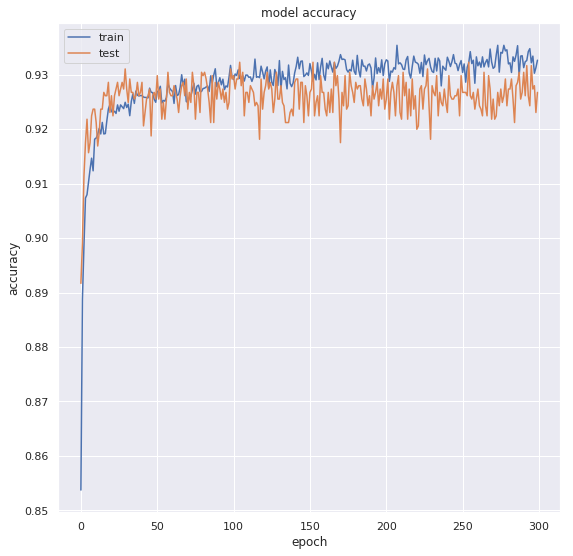

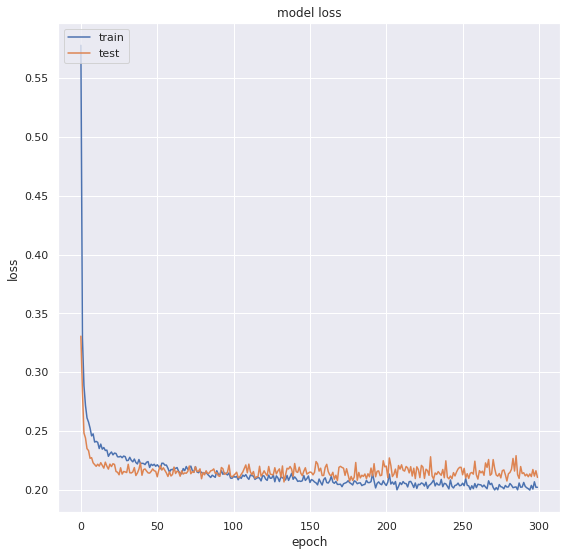

16242/16242 [==============================] - 1s 59us/step


(4061, 3)

In [55]:
#Building Artifcial Nerual Network
classifier = Sequential()
#First input Layer
classifier.add(Dense(300, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001), input_dim=168))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
classifier.add(Dropout(0.5))

classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
classifier.add(Dropout(0.5))

#classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
#classifier.add(Dropout(0.5))

#Output Layer
classifier.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer = 'adam',
                   loss='categorical_crossentropy',
                   metrics =['accuracy'])

#Fitting the data to the training dataset
history = classifier.fit(train_x,train_y, batch_size=100, epochs=300, validation_split=0.10)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

eval_model=classifier.evaluate(train_x,train_y)
eval_model

y_pred=classifier.predict(test_x)
y_pred =(y_pred>0.5)

#evaluateion
y_pred.shape

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(test_y, y_pred)
#print(cm)

In [56]:
#Calculating hamming loss
from sklearn.metrics import hamming_loss
a  = hamming_loss(test_y, y_pred)
1 - a

0.9483706804563736

In [57]:
# Create function returning a compiled network
def create_network():
       #Building Artifcial Nerual Network
    network = Sequential()
    #First input Layer
    network.add(Dense(300, activation='relu', kernel_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001),
                      input_dim=168))
    network.add(Dropout(0.5))
    #Second  Hidden Layer
    network.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)))
    network.add(Dropout(0.5))
    network.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
    network.add(Dropout(0.5))

    #classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
    #classifier.add(Dropout(0.65))
    #Output Layer
    network.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

    #Compiling the neural network
    network.compile(optimizer = 'adam',
                       loss='categorical_crossentropy',
                       metrics =['accuracy'])
        # Return compiled network
    return network
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=300, 
                                 batch_size=100, 
                                 verbose=1)
# Done cross validation; and also used for efficiency analysis
# Evaluate neural network using three-fold cross-validation
#cross_val_score(neural_network, train_x, train_y, cv=3)
#y=neuralnetwork.predict(test_x)

Epoch 1/300
10828/10828 [==============================] - 1s 106us/step - loss: 0.6211 - acc: 0.8549
Epoch 2/300
10828/10828 [==============================] - 1s 63us/step - loss: 0.3492 - acc: 0.8776
Epoch 3/300
10828/10828 [==============================] - 1s 65us/step - loss: 0.3063 - acc: 0.8903
Epoch 4/300
10828/10828 [==============================] - 1s 65us/step - loss: 0.2821 - acc: 0.9004
Epoch 5/300
10828/10828 [==============================] - 1s 65us/step - loss: 0.2718 - acc: 0.9023
Epoch 6/300
10828/10828 [==============================] - 1s 66us/step - loss: 0.2606 - acc: 0.9097
Epoch 7/300
10828/10828 [==============================] - 1s 67us/step - loss: 0.2543 - acc: 0.9096
Epoch 8/300
10828/10828 [==============================] - 1s 65us/step - loss: 0.2497 - acc: 0.9141
Epoch 9/300
10828/10828 [==============================] - 1s 64us/step - loss: 0.2485 - acc: 0.9159
Epoch 10/300
10828/10828 [==============================] - 1s 66us/step - loss: 0.2433 - 

NameError: ignored

In [59]:
!pip install linetimer

In [0]:
# Defining a class to calculate the time taken by our model
from linetimer import CodeTimer
import timeit

class CodeTimer:
    def __init__(self, name=None):
        self.name = " '"  + name + "'" if name else ''

    def __enter__(self):
        self.start = timeit.default_timer()

    def __exit__(self, exc_type, exc_value, traceback):
        self.took = (timeit.default_timer() - self.start) * 1000.0
        print('Code block' + self.name + ' took: ' + str(self.took) + ' ms')

Train on 14617 samples, validate on 1625 samples
Epoch 1/200
14617/14617 [==============================] - 23s 2ms/step - loss: 0.5598 - acc: 0.8540 - val_loss: 0.3235 - val_acc: 0.8929
Epoch 2/200
14617/14617 [==============================] - 2s 164us/step - loss: 0.3281 - acc: 0.8821 - val_loss: 0.2770 - val_acc: 0.9009
Epoch 3/200
14617/14617 [==============================] - 2s 151us/step - loss: 0.2888 - acc: 0.8938 - val_loss: 0.2501 - val_acc: 0.9151
Epoch 4/200
14617/14617 [==============================] - 2s 144us/step - loss: 0.2693 - acc: 0.9009 - val_loss: 0.2383 - val_acc: 0.9175
Epoch 5/200
14617/14617 [==============================] - 2s 165us/step - loss: 0.2613 - acc: 0.9063 - val_loss: 0.2303 - val_acc: 0.9212
Epoch 6/200
14617/14617 [==============================] - 2s 162us/step - loss: 0.2559 - acc: 0.9069 - val_loss: 0.2345 - val_acc: 0.9120
Epoch 7/200
14617/14617 [==============================] - 2s 150us/step - loss: 0.2540 - acc: 0.9095 - val_loss: 0.22

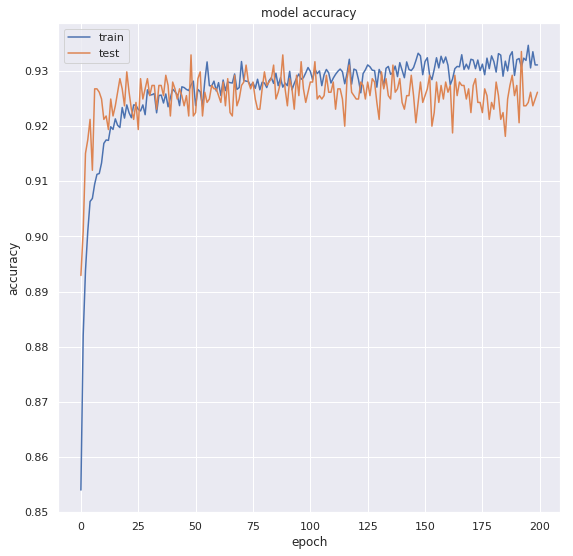

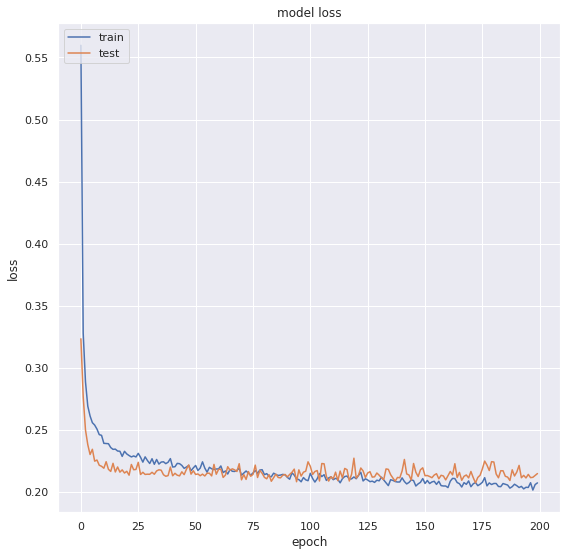

16242/16242 [==============================] - 5s 292us/step
Code block 'Our cutest model efficiency analysis' took: 494065.0900879991 ms


In [69]:
# Now Checking efficiency analysis by taking different number of epochs
with CodeTimer('Our cutest model efficiency analysis'):
    #Building Artifcial Nerual Network
    classifier = Sequential()
    #First input Layer
    classifier.add(Dense(300, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001), input_dim=168))
    classifier.add(Dropout(0.5))
    #Second  Hidden Layer
    classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
    classifier.add(Dropout(0.5))

    classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
    classifier.add(Dropout(0.5))

    #classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal', kernel_regularizer = regularizers.l2(0.001)))
    #classifier.add(Dropout(0.5))

    #Output Layer
    classifier.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))

    #Compiling the neural network
    classifier.compile(optimizer = 'adam',
                       loss='categorical_crossentropy',
                       metrics =['accuracy'])

    #Fitting the data to the training dataset
    history = classifier.fit(train_x,train_y, batch_size=100, epochs=200, validation_split=0.10)

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    eval_model=classifier.evaluate(train_x,train_y)
    eval_model

    y_pred=classifier.predict(test_x)
    y_pred =(y_pred>0.5)

    #evaluateion
    y_pred.shape

    #from sklearn.metrics import confusion_matrix
    #cm = confusion_matrix(test_y, y_pred)
    #print(cm)

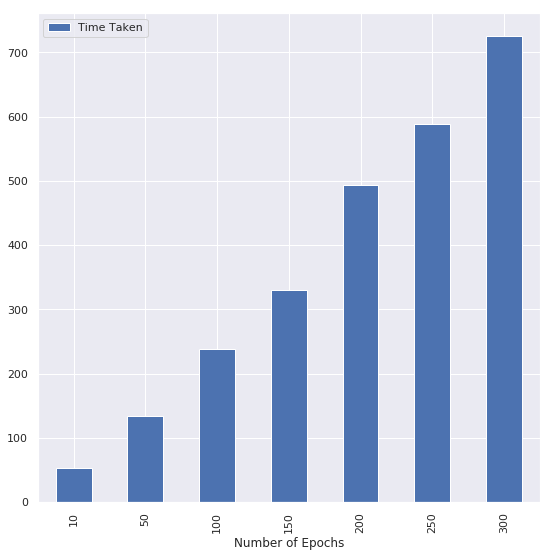

In [94]:
# When number of Epochs = 300 time taken 725    seconds
# When number of Epochs = 250 time taken 589    seconds
# When number of Epochs = 200 time taken 494    seconds
# When number of Epochs = 150 time taken 331    seconds
# When number of Epochs = 100 time taken 239    seconds
# When number of Epochs = 50 time taken 135     seconds
# When number of Epochs = 10 time taken 53      seconds
x = np.array([10,50,100, 150, 200, 250, 300])
y = np.array([53,135,239,331,494, 589, 725])
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.columns = ['Number of Epochs']
y.columns = ['Time Taken']
rft = pd.concat([x, y], axis=1)
#rft.rename(columns = {list(rft)[1]: 'col_1_new_name', list(rft)[0]: 'col_1_name'}, inplace = True)
rft.head()
rft.plot(x = 'Number of Epochs', y='Time Taken', kind='bar') 
plt.show()